Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score
import warnings
warnings.filterwarnings("ignore")

Import Data and Preprocessing

In [2]:
df = pd.read_excel('82210-1.xlsx')
df

Y   M   D     T    TM   Tm     SLP    STP   H     PP    VV     V  \
0     1991   1   1   5.3   9.6  0.0       -      -  86      0   3.4   2.4   
1     1991   1   2   2.6   6.4  0.0       -      -  88      0   3.7   4.1   
2     1991   1   3   2.3   5.2 -1.0       -      -  87      0   2.6   2.0   
3     1991   1   4   3.9  10.0  0.0       -      -  63      0   8.0   4.4   
4     1991   1   5   2.9  10.4 -3.0       -      -  69      0  10.5   5.2   
...    ...  ..  ..   ...   ...  ...     ...    ...  ..    ...   ...   ...   
1821  1995  12  27   9.7  11.0  6.5  1008.8  941.1  87    6.1  10.1  11.7   
1822  1995  12  28  11.3  14.0  8.0  1012.8    945  78      0  12.4  14.6   
1823  1995  12  29   9.0  10.2  7.6  1011.6  943.1  95   7.87   6.9   8.5   
1824  1995  12  30  11.5  14.0  8.8  1001.6  935.1  91  21.08  10.3  17.8   
1825  1995  12  31  11.3  14.0  8.0  1004.8  937.7  79   1.02  12.4  19.8   

        VM    VG  FG  RA  SN  GR  TS  TR  
0       13     -   1   0   0   0   0   0  
1     11.1     -   1   0   0   0   0   0  
2      9.4     -   1   0   0   0   0   0  
3     25.9     -   1   0   0   0   0   0  
4     18.3     -   0   0   0   0   0   0  
...    ...   ...  ..  ..  ..  ..  ..  ..  
1821  22.2  33.5   0   1   0   0   0   0  
1822  22.2  40.7   0   1   0   0   0   0  
1823  16.5     -   0   1   0   0   0   0  
1824  29.4  53.5   0   1   0   0   0   0  
1825    37  51.9   0   1   0   0   0   0  

[1826 rows x 20 columns]

In [3]:
df_info = pd.read_excel('info-EN.xlsx')
df_info

Y Unnamed: 1                                               Year
0     M        NaN                                              Month
1     D        NaN                                                Day
2     T         °C                                Average Temperature
3    TM         °C                                Maximum temperature
4    Tm         °C                                Minimum temperature
5   SLP        hPa          Average atmospheric pressure at sea level
6   STP        hPa  Average atmospheric pressure at the station level
7     H          %                          Average relative humidity
8    PP         mm                   Total rainfall and / or snowmelt
9    VV         Km                                 Average visibility
10    V       km/h                                 Average wind speed
11   VM       km/h                       Maximum sustained wind speed
12   VG       km/h                              Maximum speed of wind
13   FG      0 - 1                   Indicator for occurrence of: Fog
14   RA      0 - 1       Indicator for occurrence of: Rain or Drizzle
15   SN      0 - 1   Indicator for occurrence of: Snow or Ice Pellets
16   GR      0 - 1                  Indicator for occurrence of: Hail
17   TS      0 - 1               Indicator for occurrence of: Thunder
18   TR      0 - 1  Indicator for occurrence of: Tornado / Funnel ...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1826 non-null   int64  
 1   M       1826 non-null   int64  
 2   D       1826 non-null   int64  
 3   T       1826 non-null   float64
 4   TM      1826 non-null   float64
 5   Tm      1826 non-null   float64
 6   SLP     1826 non-null   object 
 7   STP     1826 non-null   object 
 8   H       1826 non-null   object 
 9   PP      1826 non-null   object 
 10  VV      1826 non-null   float64
 11  V       1826 non-null   float64
 12  VM      1826 non-null   object 
 13  VG      1826 non-null   object 
 14  FG      1826 non-null   int64  
 15  RA      1826 non-null   int64  
 16  SN      1826 non-null   int64  
 17  GR      1826 non-null   int64  
 18  TS      1826 non-null   int64  
 19  TR      1826 non-null   int64  
dtypes: float64(5), int64(9), object(6)
memory usage: 285.4+ KB


In [5]:
df[['D', 'M', 'Y']] = df[['D', 'M', 'Y']].apply(pd.to_numeric, errors='coerce')

In [6]:
df = df.dropna(subset=['D', 'M', 'Y'])
df['Date'] = pd.to_datetime(df['Y'].astype(str) + '-' + df['M'].astype(str) + '-' + df['D'].astype(str), errors='coerce')

In [7]:
df

Y   M   D     T    TM   Tm     SLP    STP   H     PP  ...     V  \
0     1991   1   1   5.3   9.6  0.0       -      -  86      0  ...   2.4   
1     1991   1   2   2.6   6.4  0.0       -      -  88      0  ...   4.1   
2     1991   1   3   2.3   5.2 -1.0       -      -  87      0  ...   2.0   
3     1991   1   4   3.9  10.0  0.0       -      -  63      0  ...   4.4   
4     1991   1   5   2.9  10.4 -3.0       -      -  69      0  ...   5.2   
...    ...  ..  ..   ...   ...  ...     ...    ...  ..    ...  ...   ...   
1821  1995  12  27   9.7  11.0  6.5  1008.8  941.1  87    6.1  ...  11.7   
1822  1995  12  28  11.3  14.0  8.0  1012.8    945  78      0  ...  14.6   
1823  1995  12  29   9.0  10.2  7.6  1011.6  943.1  95   7.87  ...   8.5   
1824  1995  12  30  11.5  14.0  8.8  1001.6  935.1  91  21.08  ...  17.8   
1825  1995  12  31  11.3  14.0  8.0  1004.8  937.7  79   1.02  ...  19.8   

        VM    VG FG  RA  SN  GR  TS  TR       Date  
0       13     -  1   0   0   0   0   0 1991-01-01  
1     11.1     -  1   0   0   0   0   0 1991-01-02  
2      9.4     -  1   0   0   0   0   0 1991-01-03  
3     25.9     -  1   0   0   0   0   0 1991-01-04  
4     18.3     -  0   0   0   0   0   0 1991-01-05  
...    ...   ... ..  ..  ..  ..  ..  ..        ...  
1821  22.2  33.5  0   1   0   0   0   0 1995-12-27  
1822  22.2  40.7  0   1   0   0   0   0 1995-12-28  
1823  16.5     -  0   1   0   0   0   0 1995-12-29  
1824  29.4  53.5  0   1   0   0   0   0 1995-12-30  
1825    37  51.9  0   1   0   0   0   0 1995-12-31  

[1826 rows x 21 columns]

Data Analysis

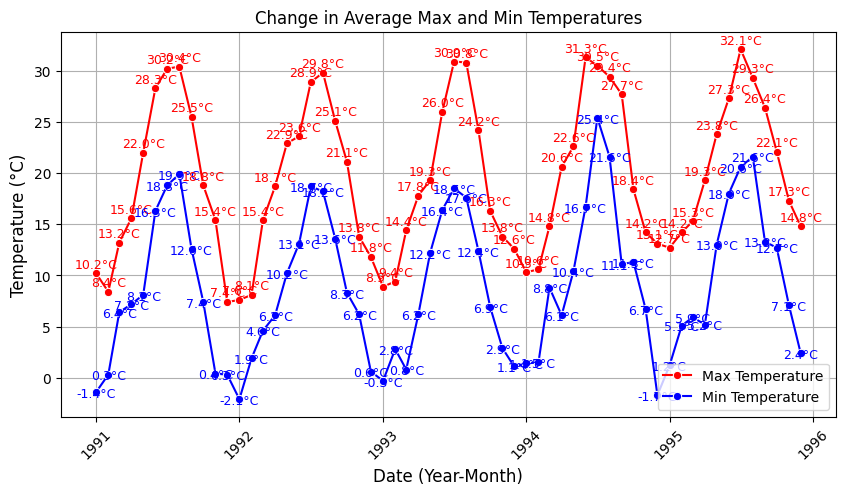

In [8]:
temp_df = df.copy()
monthly_stats = temp_df.groupby(['Y', 'M'])['T'].agg(['max', 'min']).reset_index()
monthly_stats.rename(columns={'max': 'Max Temp', 'min': 'Min Temp'}, inplace=True)
monthly_stats['Date'] = pd.to_datetime(
    monthly_stats['Y'].astype(str) + '-' + monthly_stats['M'].astype(str) + '-1'
)
plt.figure(figsize=(10,5))
sb.lineplot(x='Date', y='Max Temp', data=monthly_stats, marker='o', label='Max Temperature', color='red')
sb.lineplot(x='Date', y='Min Temp', data=monthly_stats, marker='o', label='Min Temperature', color='blue')
for i in range(len(monthly_stats)):
    plt.text(
        x=monthly_stats['Date'][i],
        y=monthly_stats['Max Temp'][i] + 0.5,
        s=f"{monthly_stats['Max Temp'][i]}°C",
        color='red',
        fontsize=9,
        ha='center',
    )
    plt.text(
        x=monthly_stats['Date'][i],
        y=monthly_stats['Min Temp'][i] - 0.5,
        s=f"{monthly_stats['Min Temp'][i]}°C",
        color='blue',
        fontsize=9,
        ha='center',
    )
plt.title('Change in Average Max and Min Temperatures')
plt.xlabel('Date (Year-Month)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


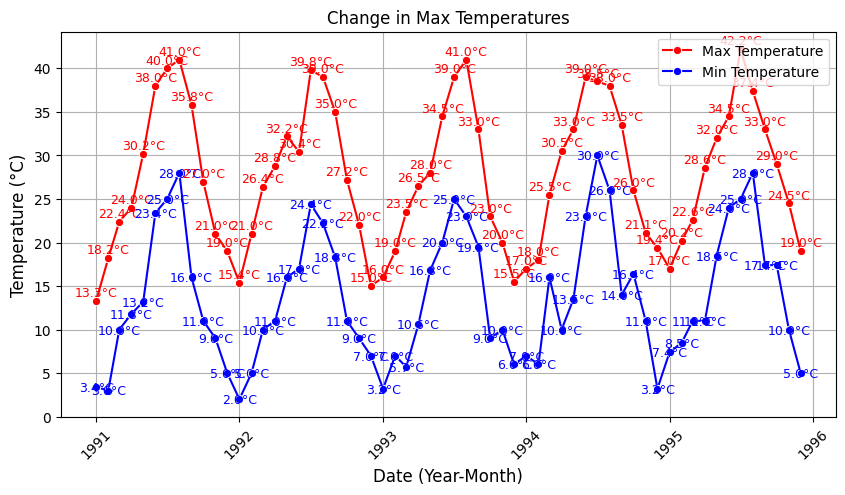

In [9]:
monthly_stats = temp_df.groupby(['Y', 'M'])['TM'].agg(['max', 'min']).reset_index()
monthly_stats.rename(columns={'max': 'Max Temp', 'min': 'Min Temp'}, inplace=True)
monthly_stats['Date'] = pd.to_datetime(
    monthly_stats['Y'].astype(str) + '-' + monthly_stats['M'].astype(str) + '-1'
)
plt.figure(figsize=(10,5))
sb.lineplot(x='Date', y='Max Temp', data=monthly_stats, marker='o', label='Max Temperature', color='red')
sb.lineplot(x='Date', y='Min Temp', data=monthly_stats, marker='o', label='Min Temperature', color='blue')
for i in range(len(monthly_stats)):
    plt.text(
        x=monthly_stats['Date'][i],
        y=monthly_stats['Max Temp'][i] + 0.5,
        s=f"{monthly_stats['Max Temp'][i]}°C",
        color='red',
        fontsize=9,
        ha='center',
    )
    plt.text(
        x=monthly_stats['Date'][i],
        y=monthly_stats['Min Temp'][i] - 0.5,
        s=f"{monthly_stats['Min Temp'][i]}°C",
        color='blue',
        fontsize=9,
        ha='center',
    )
plt.title('Change in Max Temperatures')
plt.xlabel('Date (Year-Month)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


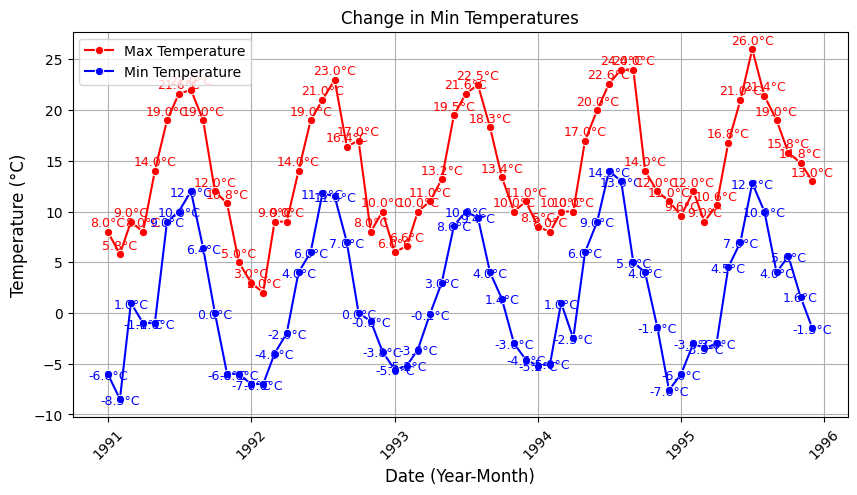

In [10]:
monthly_stats = temp_df.groupby(['Y', 'M'])['Tm'].agg(['max', 'min']).reset_index()
monthly_stats.rename(columns={'max': 'Max Temp', 'min': 'Min Temp'}, inplace=True)
monthly_stats['Date'] = pd.to_datetime(
    monthly_stats['Y'].astype(str) + '-' + monthly_stats['M'].astype(str) + '-1'
)
plt.figure(figsize=(10,5))
sb.lineplot(x='Date', y='Max Temp', data=monthly_stats, marker='o', label='Max Temperature', color='red')
sb.lineplot(x='Date', y='Min Temp', data=monthly_stats, marker='o', label='Min Temperature', color='blue')
for i in range(len(monthly_stats)):
    plt.text(
        x=monthly_stats['Date'][i],
        y=monthly_stats['Max Temp'][i] + 0.5,
        s=f"{monthly_stats['Max Temp'][i]}°C",
        color='red',
        fontsize=9,
        ha='center',
    )
    plt.text(
        x=monthly_stats['Date'][i],
        y=monthly_stats['Min Temp'][i] - 0.5,
        s=f"{monthly_stats['Min Temp'][i]}°C",
        color='blue',
        fontsize=9,
        ha='center',
    )
plt.title('Change in Min Temperatures')
plt.xlabel('Date (Year-Month)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [11]:
values_to_null = ['-']

object_columns = temp_df.select_dtypes(include=['object']).columns

# Replace values in multiple columns and convert to float
for col in object_columns:
    temp_df[col] = temp_df[col].replace(values_to_null, np.nan).astype(float)

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Y       1826 non-null   int64         
 1   M       1826 non-null   int64         
 2   D       1826 non-null   int64         
 3   T       1826 non-null   float64       
 4   TM      1826 non-null   float64       
 5   Tm      1826 non-null   float64       
 6   SLP     901 non-null    float64       
 7   STP     1552 non-null   float64       
 8   H       1822 non-null   float64       
 9   PP      1824 non-null   float64       
 10  VV      1826 non-null   float64       
 11  V       1826 non-null   float64       
 12  VM      1821 non-null   float64       
 13  VG      323 non-null    float64       
 14  FG      1826 non-null   int64         
 15  RA      1826 non-null   int64         
 16  SN      1826 non-null   int64         
 17  GR      1826 non-null   int64         
 18  TS      

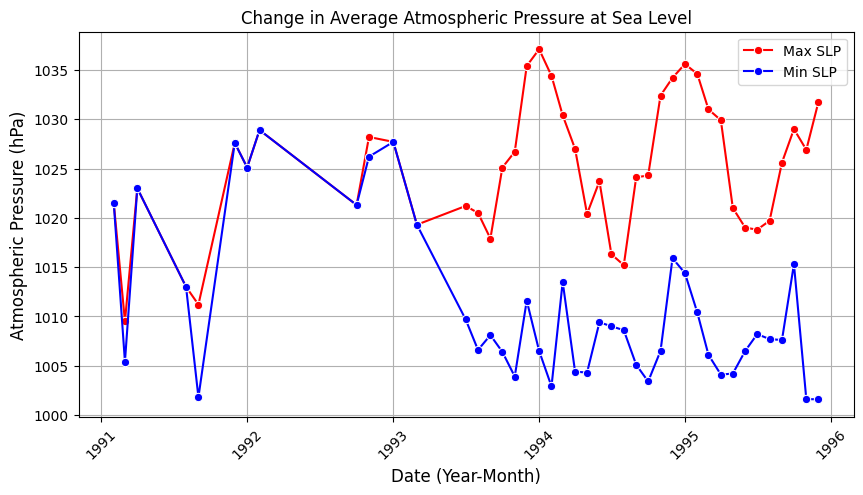

In [12]:
monthly_stats = temp_df.groupby(['Y', 'M'])['SLP'].agg(['max', 'min']).reset_index()
monthly_stats.rename(columns={'max': 'Max SLP', 'min': 'Min SLP'}, inplace=True)
monthly_stats['Date'] = pd.to_datetime(
    monthly_stats['Y'].astype(str) + '-' + monthly_stats['M'].astype(str) + '-1'
)
plt.figure(figsize=(10,5))
sb.lineplot(x='Date', y='Max SLP', data=monthly_stats, marker='o', label='Max SLP', color='red')
sb.lineplot(x='Date', y='Min SLP', data=monthly_stats, marker='o', label='Min SLP', color='blue')
plt.title('Change in Average Atmospheric Pressure at Sea Level')
plt.xlabel('Date (Year-Month)', fontsize=12)
plt.ylabel('Atmospheric Pressure (hPa)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


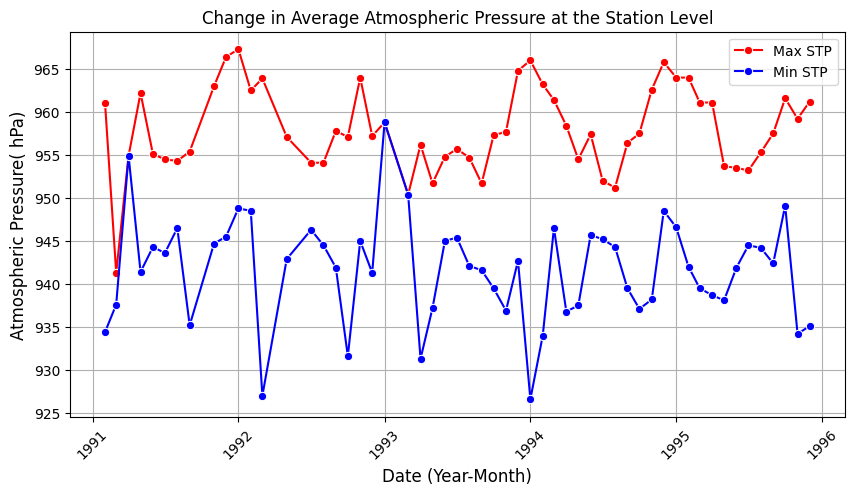

In [13]:
monthly_stats = temp_df.groupby(['Y', 'M'])['STP'].agg(['max', 'min']).reset_index()
monthly_stats.rename(columns={'max': 'Max STP', 'min': 'Min STP'}, inplace=True)
monthly_stats['Date'] = pd.to_datetime(
    monthly_stats['Y'].astype(str) + '-' + monthly_stats['M'].astype(str) + '-1'
)
plt.figure(figsize=(10,5))
sb.lineplot(x='Date', y='Max STP', data=monthly_stats, marker='o', label='Max STP', color='red')
sb.lineplot(x='Date', y='Min STP', data=monthly_stats, marker='o', label='Min STP', color='blue')
plt.title('Change in Average Atmospheric Pressure at the Station Level')
plt.xlabel('Date (Year-Month)', fontsize=12)
plt.ylabel('Atmospheric Pressure( hPa)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

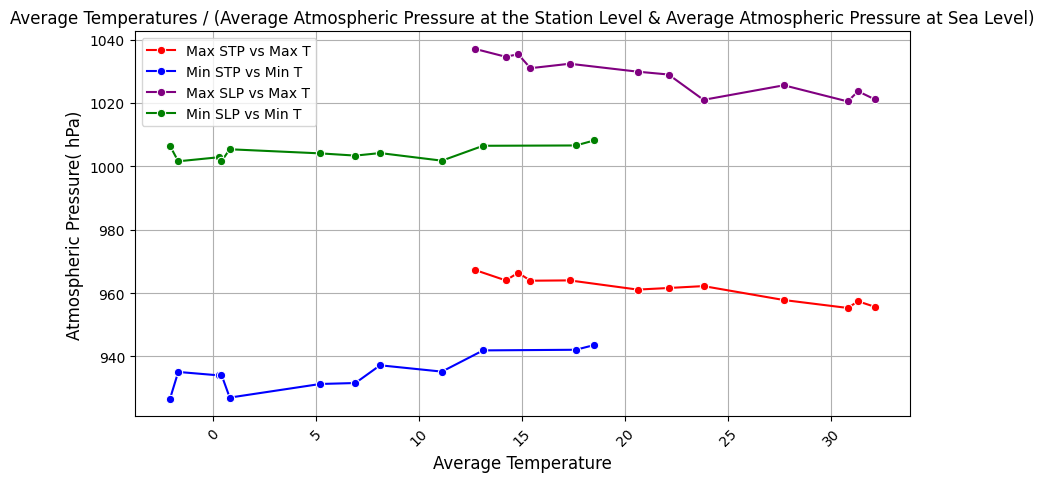

In [20]:
monthly_stats = temp_df.groupby('M')[['T', 'STP','SLP']].agg({
    'T': ['max', 'min'],
    'STP': ['max', 'min'],
    'SLP': ['max', 'min']
}).reset_index()
monthly_stats.columns = ['M', 'Max T', 'Min T', 'Max STP', 'Min STP', 'Max SLP', 'Min SLP']
plt.figure(figsize=(10,5))
sb.lineplot(x='Max T', y='Max STP', data=monthly_stats, marker='o', label='Max STP vs Max T', color='red')
sb.lineplot(x='Min T', y='Min STP', data=monthly_stats, marker='o', label='Min STP vs Min T', color='blue')
sb.lineplot(x='Max T', y='Max SLP', data=monthly_stats, marker='o', label='Max SLP vs Max T', color='purple')
sb.lineplot(x='Min T', y='Min SLP', data=monthly_stats, marker='o', label='Min SLP vs Min T', color='green')
plt.title('Average Temperatures / (Average Atmospheric Pressure at the Station Level & Average Atmospheric Pressure at Sea Level)')
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Atmospheric Pressure( hPa)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Model Training for Rain Prediction

In [22]:
temp_df.columns

Index(['Y', 'M', 'D', 'T', 'TM', 'Tm', 'SLP', 'STP', 'H', 'PP', 'VV', 'V',
       'VM', 'VG', 'FG', 'RA', 'SN', 'GR', 'TS', 'TR', 'Date'],
      dtype='object')

In [23]:
Rain_model_df=temp_df.drop(columns=['Y', 'D','VM', 'VG', 'FG', 'SN', 'GR', 'TS', 'TR', 'Date','PP'],inplace=False)

In [24]:
Rain_model_df

M     T    TM   Tm     SLP    STP     H    VV     V  RA
0      1   5.3   9.6  0.0     NaN    NaN  86.0   3.4   2.4   0
1      1   2.6   6.4  0.0     NaN    NaN  88.0   3.7   4.1   0
2      1   2.3   5.2 -1.0     NaN    NaN  87.0   2.6   2.0   0
3      1   3.9  10.0  0.0     NaN    NaN  63.0   8.0   4.4   0
4      1   2.9  10.4 -3.0     NaN    NaN  69.0  10.5   5.2   0
...   ..   ...   ...  ...     ...    ...   ...   ...   ...  ..
1821  12   9.7  11.0  6.5  1008.8  941.1  87.0  10.1  11.7   1
1822  12  11.3  14.0  8.0  1012.8  945.0  78.0  12.4  14.6   1
1823  12   9.0  10.2  7.6  1011.6  943.1  95.0   6.9   8.5   1
1824  12  11.5  14.0  8.8  1001.6  935.1  91.0  10.3  17.8   1
1825  12  11.3  14.0  8.0  1004.8  937.7  79.0  12.4  19.8   1

[1826 rows x 10 columns]

In [25]:
Rain_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       1826 non-null   int64  
 1   T       1826 non-null   float64
 2   TM      1826 non-null   float64
 3   Tm      1826 non-null   float64
 4   SLP     901 non-null    float64
 5   STP     1552 non-null   float64
 6   H       1822 non-null   float64
 7   VV      1826 non-null   float64
 8   V       1826 non-null   float64
 9   RA      1826 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 142.8 KB


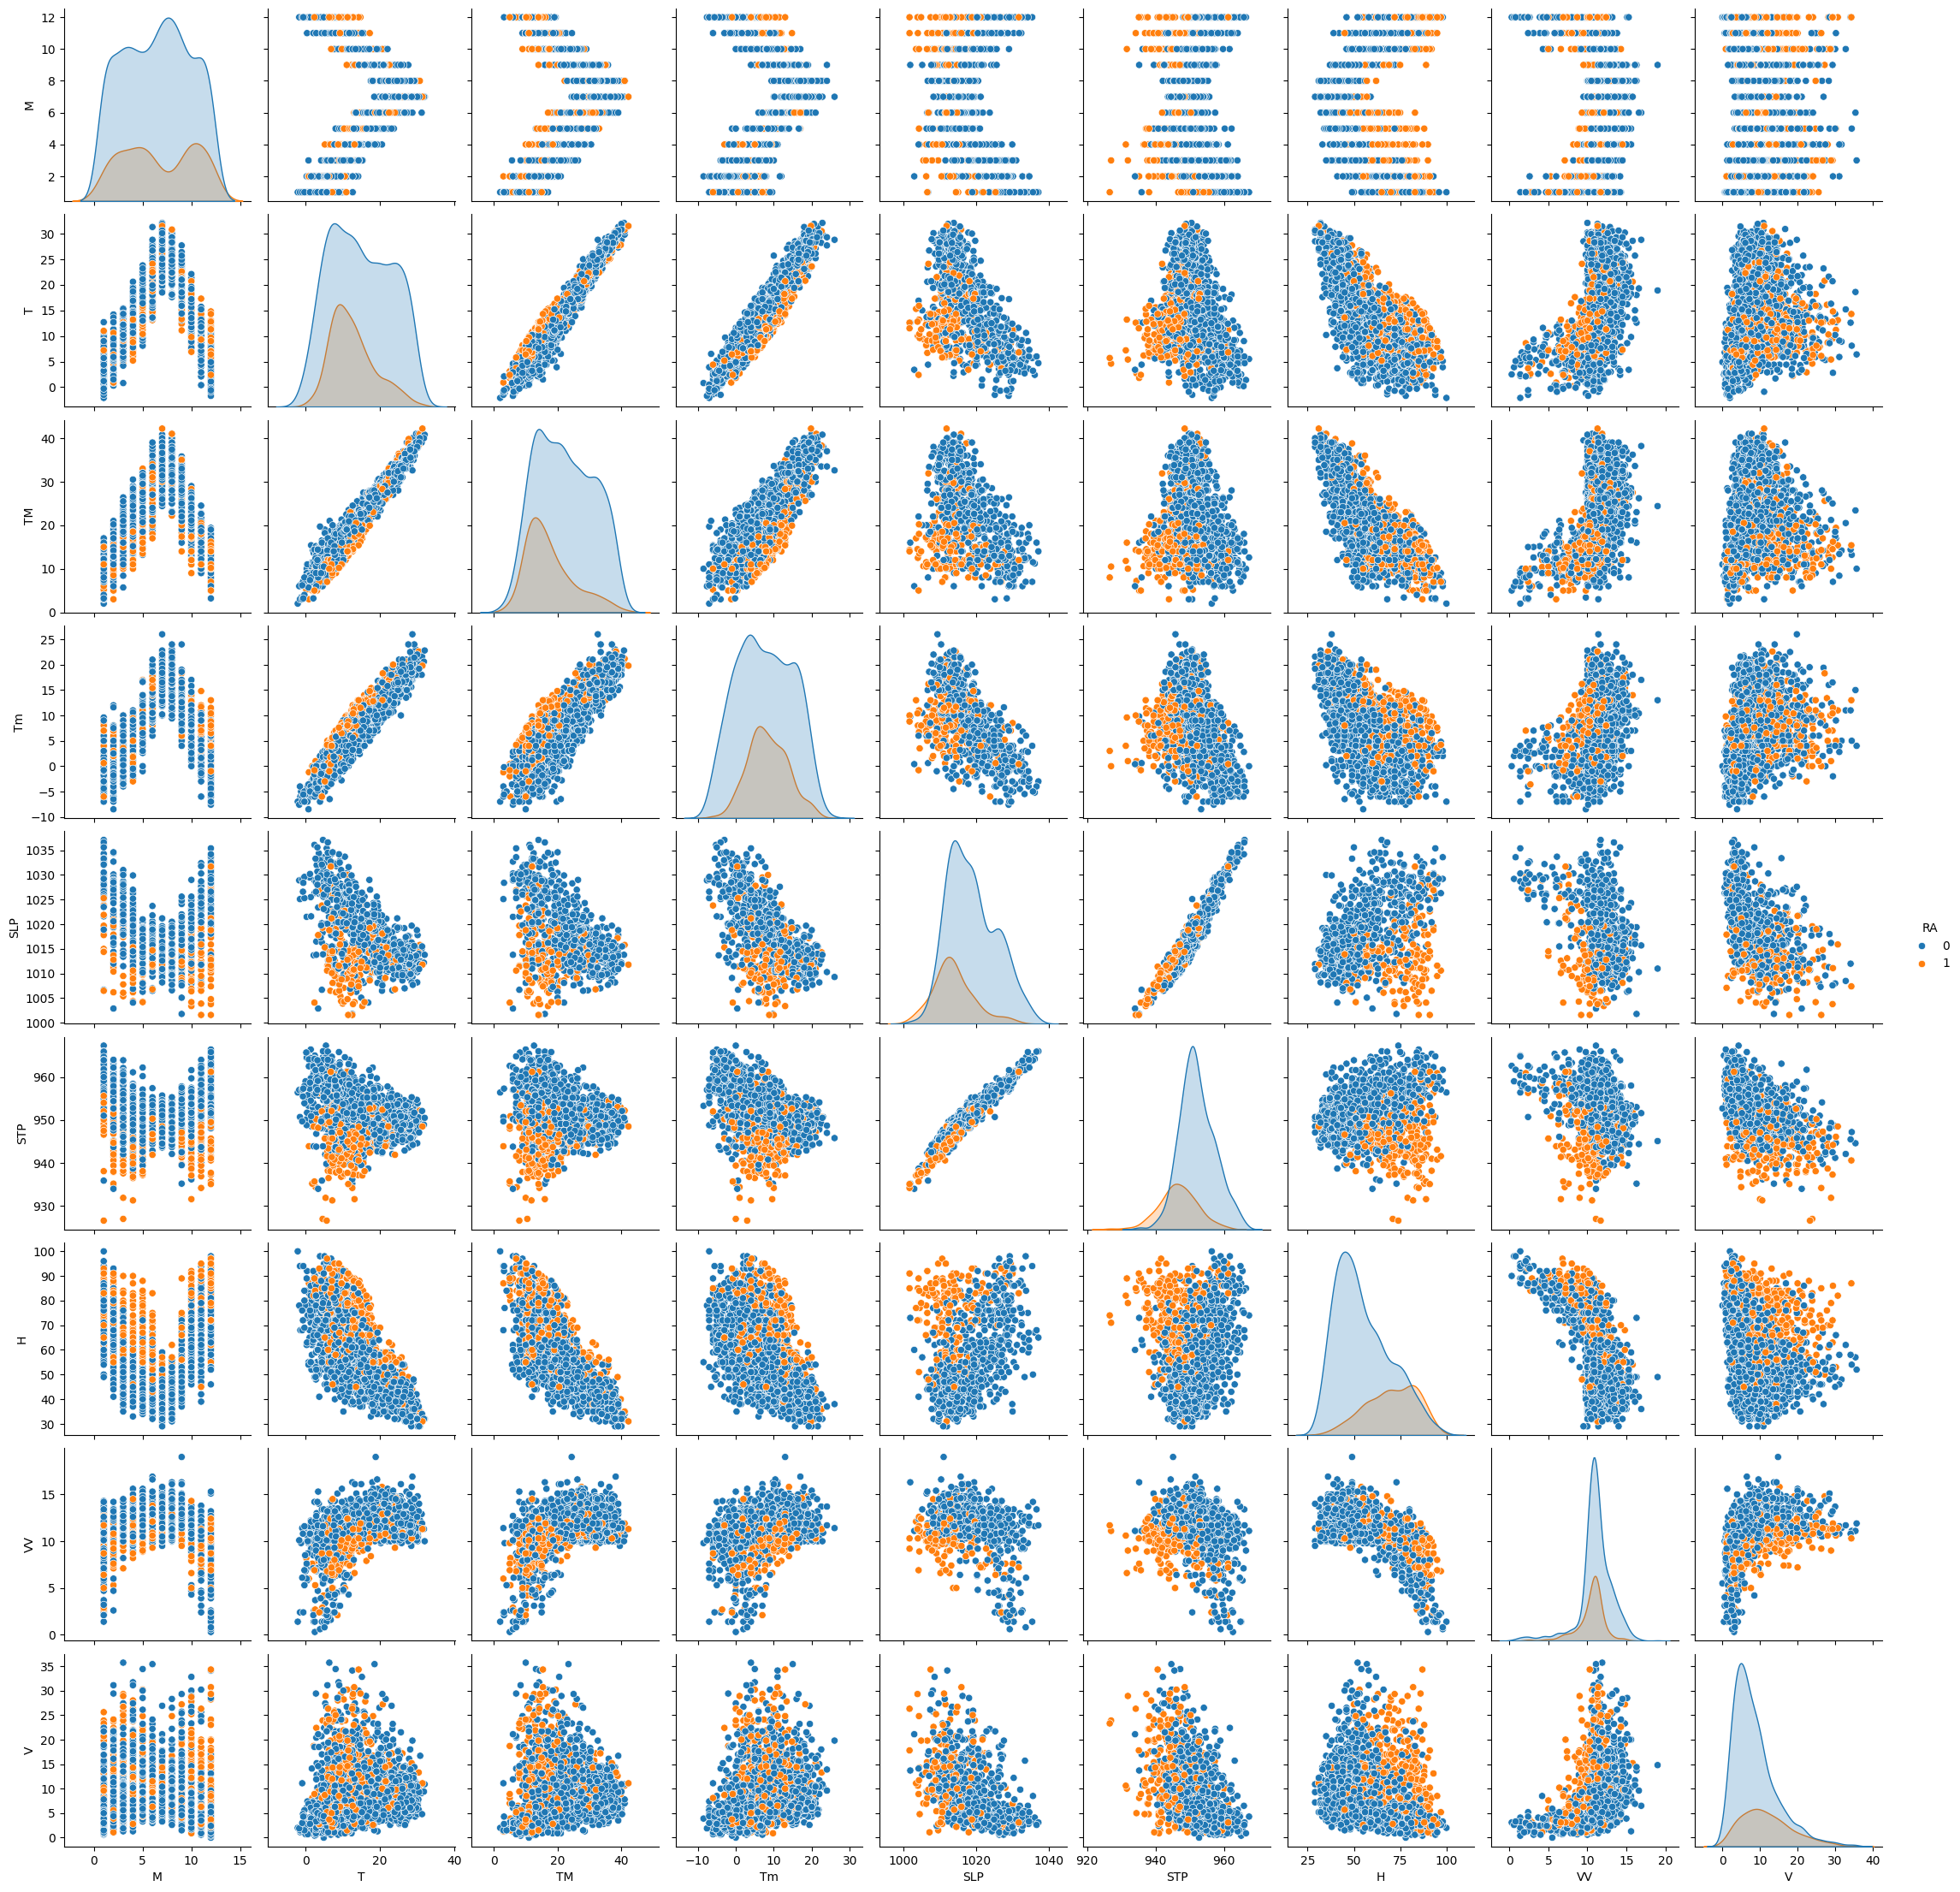

In [26]:
sb.pairplot(Rain_model_df,hue='RA')

In [18]:
Rain_model_df.fillna(Rain_model_df.median(), inplace=True)
Rain_model_df['Temp_Spread'] = Rain_model_df['TM'] - Rain_model_df['Tm']
Rain_model_df['RA'] = Rain_model_df['RA'].astype('category')
scaler = StandardScaler()
columns_to_scale = ['T', 'TM', 'Tm', 'SLP', 'STP', 'H', 'VV']
Rain_model_df[columns_to_scale] = scaler.fit_transform(Rain_model_df[columns_to_scale])

In [19]:
x=Rain_model_df.drop("RA",axis='columns')
y=Rain_model_df.RA
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)

r2 = r2_score(y_test, y_prob)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.86
R² Score: 0.47
Precision: 0.75
Recall: 0.57
F1-Score: 0.65
Confusion Matrix:
[[268  16]
 [ 35  47]]
